---

# **<font color="#6767bf"> Modelación Climática Tropical</font>**
## **<font color="#8282d6"> Atlantic Multidecadal Variability </font>**
### **<font color="#a6a6f1"> Índices y mapas de anomalías MSWEP </font>**


---

In [1]:
pip install xarray

  Using cached xarray-2025.10.1-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
Using cached xarray-2025.10.1-py3-none-any.whl (1.4 MB)
Using cached packaging-25.0-py3-none-any.whl (66 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

  Using cached cftime-1.6.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

  Using cached h5netcdf-1.7.3-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.15.1-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (3.0 kB)
Using cached h5netcdf-1.7.3-py3-none-any.whl (56 kB)
Using cached h5py-3.15.1-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (4.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

  Using cached netcdf4-1.7.3-cp311-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.9 kB)
Using cached netcdf4-1.7.3-cp311-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (9.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cartopy

  Using cached cartopy-0.25.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached pyshp-3.0.2.post1-py3-none-any.whl.metadata (64 kB)
Using cached cartopy-0.25.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (11.8 MB)
Using cached pyshp-3.0.2.post1-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
#Paqueterias
import pandas as pd
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
from scipy import stats

In [7]:
def mapa_MC(data, levels, ccmap, titulo, extend='both', cbarlabel='pr  [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [8]:
# Cargamos el archivo del índice AMV de la NOAA
file_path = 'AMV_NOAA_df.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])  

In [9]:
# Obtenemos los valores positivos
#positivos = amv_JJAS[amv_JJAS['AMV_NOAA'] > 0]
#positivos

In [10]:
df['rolled']=df.AMV_NOAA.rolling(window=120, min_periods=60).mean()

In [11]:
# se filtran los meses de JJAS 
amv_JJAS = df[df['Date'].dt.month.isin([6, 7, 8, 9])]
print(amv_JJAS)

           Date  AMV_NOAA    rolled
5    1854-06-15     -0.18       NaN
6    1854-07-15     -0.07       NaN
7    1854-08-15     -0.20       NaN
8    1854-09-15     -0.04       NaN
17   1855-06-15     -0.06       NaN
...         ...       ...       ...
2024 2022-09-15      0.98  0.592750
2033 2023-06-15      1.27  0.624000
2034 2023-07-15      1.44  0.631583
2035 2023-08-15      1.36  0.638750
2036 2023-09-15      1.42  0.645500

[680 rows x 3 columns]


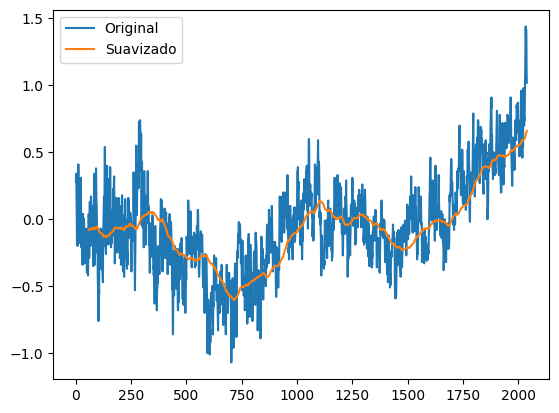

In [12]:
plt.plot(df.AMV_NOAA,label='Original')
plt.plot(df.rolled,label='Suavizado')
plt.legend()

In [13]:
# Obtenemos ahora los valores negativos
negativos = amv_JJAS[amv_JJAS['AMV_NOAA'] < 0]
negativos

,Date,AMV_NOAA,rolled
5,1854-06-15,-0.18,NaN
6,1854-07-15,-0.07,NaN
7,1854-08-15,-0.20,NaN
8,1854-09-15,-0.04,NaN
17,1855-06-15,-0.06,NaN
...,...,...,...
1687,1994-08-15,-0.22,-0.046417
1688,1994-09-15,-0.18,-0.047083
1709,1996-06-15,-0.03,0.023917
1710,1996-07-15,-0.08,0.024833


In [14]:
# Debemos cargar el .nc con precipitacion

# Archivo de precipitación MSWEP
filename='/home/jovyan/ModClim/datos_actualizados/MSWEP_monthly_1980-2023.nc'
ds=xr.open_dataset(filename)
pr=ds['precipitation']
pr=pr*8
pr['units']='mm day-1'

In [15]:
lons=pr.lon
lats=pr.lat
pr=pr.loc[dict(lat=lats[lats>0])]
pr=pr.loc[dict(lon=lons[lons>180])]

In [16]:
df_csv=df

In [17]:
# Tenemos que obtener el promedio de los años con AMV
pr=pr.sel(time=slice('1980', '2023'))
pr_jjas=pr.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)
print(pr_jjas)

<xarray.DataArray 'precipitation' (time: 176, lat: 90, lon: 288)> Size: 18MB
array([[[4.119876  , 3.994135  , 4.7164307 , ..., 0.2888985 ,
         0.23010089, 0.26236835],
        [5.1003065 , 4.836238  , 4.9290676 , ..., 0.27253404,
         0.2785008 , 0.33623788],
        [6.66457   , 6.181849  , 5.912474  , ..., 0.3223683 ,
         0.37000224, 0.44827127],
        ...,
        [4.400259  , 4.50964   , 4.5835886 , ..., 3.0382166 ,
         2.8960488 , 2.5011177 ],
        [4.5778084 , 4.6722336 , 5.2592916 , ..., 2.4642196 ,
         2.7560132 , 2.5804765 ],
        [4.218247  , 4.1693873 , 4.6856337 , ..., 2.4550345 ,
         2.8810399 , 2.8781438 ]],

       [[2.0478706 , 1.8749686 , 1.475065  , ..., 0.16045123,
         0.20477319, 0.223745  ],
        [1.9656754 , 1.9563899 , 1.812098  , ..., 0.15106454,
         0.15477332, 0.145808  ],
        [2.359295  , 2.3008478 , 2.2053258 , ..., 0.13445178,
         0.15196803, 0.14964578],
...
        [4.9000463 , 4.5659504 , 4.77002

In [18]:
def select_matching_time(datetime_index: pd.DatetimeIndex, data_array: xr.DataArray):
    xarray_time = pd.DatetimeIndex(data_array['time'].values)
    xarray_year_month = xarray_time.to_period('M')  
    
    index_year_month = datetime_index.to_period('M')
    print(index_year_month)
    print(xarray_year_month)
    matching_times = xarray_time[xarray_year_month.isin(index_year_month)]
    
    return data_array.sel(time=matching_times)

In [19]:
# Y ya obtenemos los indices positivos y negativos de las fechas con AMV ya filtradas en verano
positivos_nc = pd.to_datetime(amv_JJAS[amv_JJAS['rolled'] > 0]['Date'].values)
negativos_nc = pd.to_datetime(amv_JJAS[amv_JJAS['rolled'] < 0]['Date'].values)

In [20]:
pr_positivos=select_matching_time(positivos_nc, pr_jjas)

PeriodIndex(['1878-08', '1878-09', '1879-06', '1879-07', '1879-08', '1879-09',
             '1880-06', '1880-07', '1880-08', '1880-09',
             ...
             '2021-08', '2021-09', '2022-06', '2022-07', '2022-08', '2022-09',
             '2023-06', '2023-07', '2023-08', '2023-09'],
            dtype='period[M]', length=221)
PeriodIndex(['1980-06', '1980-07', '1980-08', '1980-09', '1981-06', '1981-07',
             '1981-08', '1981-09', '1982-06', '1982-07',
             ...
             '2021-08', '2021-09', '2022-06', '2022-07', '2022-08', '2022-09',
             '2023-06', '2023-07', '2023-08', '2023-09'],
            dtype='period[M]', length=176)


In [21]:
pr_positivos

<xarray.DataArray 'precipitation' (time: 112, lat: 90, lon: 288)> Size: 12MB
array([[[2.1904368 , 2.3599625 , 2.7190998 , ..., 0.41403067,
         0.38926753, 0.25273934],
        [2.551801  , 2.3711343 , 2.7481987 , ..., 0.44966882,
         0.5556325 , 0.34190682],
        [2.9238389 , 3.0615773 , 2.7803047 , ..., 0.5134705 ,
         0.55393136, 0.495266  ],
        ...,
        [3.6601715 , 3.882299  , 3.9859273 , ..., 1.9027286 ,
         1.4906206 , 2.0768158 ],
        [3.145867  , 3.0948272 , 3.0908866 , ..., 1.4220345 ,
         1.2459011 , 1.3844819 ],
        [2.2699893 , 2.3773987 , 2.5433753 , ..., 1.4231216 ,
         1.7393028 , 1.6323123 ]],

       [[1.3870323 , 1.3324517 , 1.2630942 , ..., 0.20267756,
         0.18061312, 0.17706612],
        [1.2761925 , 1.2252908 , 1.2881278 , ..., 0.22474068,
         0.21087159, 0.22216399],
        [1.3103565 , 1.2915838 , 1.3326796 , ..., 0.25219363,
         0.32754704, 0.3147787 ],
...
        [4.9000463 , 4.5659504 , 4.77002   , ..., 1.5442193 ,
         1.1813595 , 0.9180212 ],
        [5.26334   , 5.1066556 , 4.926981  , ..., 1.6082096 ,
         2.001552  , 1.3808626 ],
        [5.7977977 , 5.6972547 , 5.5208826 , ..., 1.0730511 ,
         1.5206599 , 1.7081478 ]],

       [[4.4942226 , 4.569148  , 4.739625  , ..., 0.36653522,
         0.36632165, 0.38508528],
        [5.395996  , 5.635566  , 7.1378126 , ..., 0.44516695,
         0.476451  , 0.49738997],
        [5.8898716 , 6.432891  , 8.225048  , ..., 0.4950747 ,
         0.5414303 , 0.67701745],
        ...,
        [4.941781  , 4.391876  , 3.7157195 , ..., 4.3345847 ,
         4.3415055 , 3.826932  ],
        [5.9112754 , 4.758473  , 4.250407  , ..., 3.3081925 ,
         3.8221161 , 2.8912458 ],
        [5.740887  , 5.0332117 , 4.6514673 , ..., 2.9972167 ,
         3.5782924 , 2.7317247 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 896B 1996-06-15T21:00:00 ... 2023-09-15T21...
  * lat      (lat) float64 720B 0.25 0.75 1.25 1.75 ... 43.25 43.75 44.25 44.75
  * lon      (lon) float64 2kB 180.3 180.9 181.6 182.2 ... 358.4 359.1 359.7
    units    <U8 32B 'mm day-1'

In [22]:
pr_negativos=select_matching_time(negativos_nc, pr_jjas)

PeriodIndex(['1859-06', '1859-07', '1859-08', '1859-09', '1860-06', '1860-07',
             '1860-08', '1860-09', '1861-06', '1861-07',
             ...
             '1993-08', '1993-09', '1994-06', '1994-07', '1994-08', '1994-09',
             '1995-06', '1995-07', '1995-08', '1995-09'],
            dtype='period[M]', length=439)
PeriodIndex(['1980-06', '1980-07', '1980-08', '1980-09', '1981-06', '1981-07',
             '1981-08', '1981-09', '1982-06', '1982-07',
             ...
             '2021-08', '2021-09', '2022-06', '2022-07', '2022-08', '2022-09',
             '2023-06', '2023-07', '2023-08', '2023-09'],
            dtype='period[M]', length=176)


In [23]:
pr_negativos

<xarray.DataArray 'precipitation' (time: 64, lat: 90, lon: 288)> Size: 7MB
array([[[ 4.119876  ,  3.994135  ,  4.7164307 , ...,  0.2888985 ,
          0.23010089,  0.26236835],
        [ 5.1003065 ,  4.836238  ,  4.9290676 , ...,  0.27253404,
          0.2785008 ,  0.33623788],
        [ 6.66457   ,  6.181849  ,  5.912474  , ...,  0.3223683 ,
          0.37000224,  0.44827127],
        ...,
        [ 4.400259  ,  4.50964   ,  4.5835886 , ...,  3.0382166 ,
          2.8960488 ,  2.5011177 ],
        [ 4.5778084 ,  4.6722336 ,  5.2592916 , ...,  2.4642196 ,
          2.7560132 ,  2.5804765 ],
        [ 4.218247  ,  4.1693873 ,  4.6856337 , ...,  2.4550345 ,
          2.8810399 ,  2.8781438 ]],

       [[ 2.0478706 ,  1.8749686 ,  1.475065  , ...,  0.16045123,
          0.20477319,  0.223745  ],
        [ 1.9656754 ,  1.9563899 ,  1.812098  , ...,  0.15106454,
          0.15477332,  0.145808  ],
        [ 2.359295  ,  2.3008478 ,  2.2053258 , ...,  0.13445178,
          0.15196803,  0.14964578],
...
        [ 9.557343  ,  7.775862  ,  6.5650444 , ...,  2.7901976 ,
          1.7682214 ,  1.3443853 ],
        [10.747962  ,  8.339872  ,  6.768584  , ...,  0.69994175,
          1.1348834 ,  2.3488722 ],
        [11.860121  ,  9.112967  ,  7.0946927 , ...,  0.54774725,
          0.7479845 ,  1.8707021 ]],

       [[ 0.2986991 ,  0.2307004 ,  0.20713313, ...,  0.64446765,
          0.75546736,  0.9405422 ],
        [ 0.25326642,  0.25446767,  0.23936711, ...,  0.8644048 ,
          0.9609673 ,  1.0723687 ],
        [ 0.27196646,  0.3099661 ,  0.35013434, ...,  1.1313709 ,
          1.3046379 ,  1.488575  ],
        ...,
        [ 3.3021936 ,  3.3291512 ,  3.3787842 , ...,  5.4156766 ,
          4.0055127 ,  3.3791294 ],
        [ 3.3476443 ,  3.216244  ,  3.0152617 , ...,  5.0781083 ,
          4.7551937 ,  3.4214606 ],
        [ 3.3986435 ,  3.2537923 ,  3.2246993 , ...,  5.085108  ,
          4.961005  ,  4.531533  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 512B 1980-06-15T21:00:00 ... 1995-09-15T21...
  * lat      (lat) float64 720B 0.25 0.75 1.25 1.75 ... 43.25 43.75 44.25 44.75
  * lon      (lon) float64 2kB 180.3 180.9 181.6 182.2 ... 358.4 359.1 359.7
    units    <U8 32B 'mm day-1'

promedio_positivos = pr_positivos.mean(dim='month')
promedio_negativos = pr_negativos.mean(dim='month')

In [24]:
def funcionsita(da):
    mes_p=da.groupby(da.time.dt.month).mean()
    promedio = mes_p.mean(dim='month')
    return promedio

In [25]:
promedio_positivos = funcionsita(pr_positivos)
promedio_negativos = funcionsita(pr_negativos)

In [26]:
# Seleccionamos los meses JJAS del csv
#df_csv[df_csv['Date'].dt.month.isin([6, 7, 8, 9])]
# Ahora va la climatología JJAS del .nc
promedio_total_JJAS = pr.sel(time=pr['time'].dt.month.isin([6, 7, 8, 9])).mean(dim='time')

In [27]:
# Calculamos las anomalías:
anom_positivos = promedio_positivos - promedio_total_JJAS
anom_negativos = promedio_negativos - promedio_total_JJAS
anom_total = promedio_positivos - promedio_negativos

# Guardamos la matriz de coeficientes de regresión en un archivo 
#anom_positivos.to_netcdf('anom_positivos_MSWEP.nc')
#anom_negativos.to_netcdf('anom_negativos_MSWEP.nc')
#anom_total.to_netcdf('anom_total_MSWEP_min.nc')

In [28]:
def calculate_p_values(data1, data2):
    # Definimos la función para la prueba t
    def ttest_func(x, y):
        # Eliminar nulos
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        # Verificar que haya datos
        if len(x) > 1 and len(y) > 1:
            t_stat, p = stats.ttest_ind(x, y, equal_var=False)
            return p
        else:
            return np.nan

    # Aplicaremos la función 
    p_values = xr.apply_ufunc(
        ttest_func, data1, data2,
        input_core_dims=[['time'], ['time']],  
        vectorize=True,                        
        dask='parallelized', 
        join='outer',
        output_dtypes=[float]                 
    )

    return p_values

In [29]:
# Calculamos los p-values
p_values = calculate_p_values(pr_positivos, pr_negativos)

In [30]:
lons=anom_total.lon
lats=anom_total.lat

In [31]:
def mapa_MC(data, levels, ccmap, titulo, p_values=None, p_levels=None, hatches=None, extend='both', 
            cbarlabel='pr  [mm día$^{-1}$]', limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    
    # Plot de contorno
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    
    # Agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

    # y el hatching con 0.05
    if p_values is not None and p_levels is not None and hatches is not None:
        # Aplicar hatching
        hatch_mask = p_values > 0.05  
        hatching = ax.contourf(lons, lats, hatch_mask, levels=[0, 0.05], colors='none', alpha=0.02,
                                hatches=hatches, transform=ccrs.PlateCarree())
    
    plt.show()  

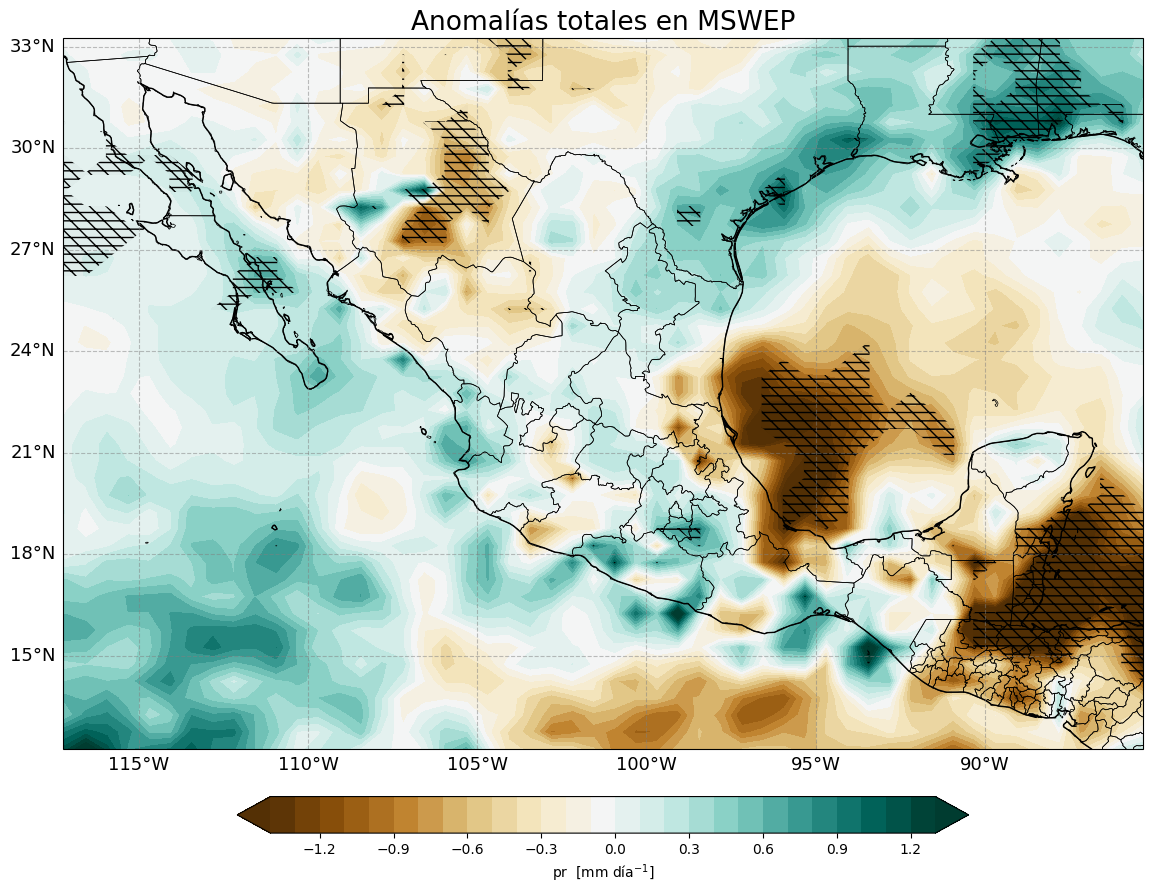

In [32]:
mapa_MC(anom_total, np.arange(-1.4, 1.4, 0.1),'BrBG','Anomalías totales en MSWEP', p_values=p_values,                         
    p_levels=np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]),  
    hatches=['\-\-'],                           
    extend='both',
    lon_min=242.75,
    lon_max=274.68,
    lat_min=12.25,
    lat_max=33.25)

In [33]:
#p_values.to_netcdf('p_values_MSWEP_min.nc')

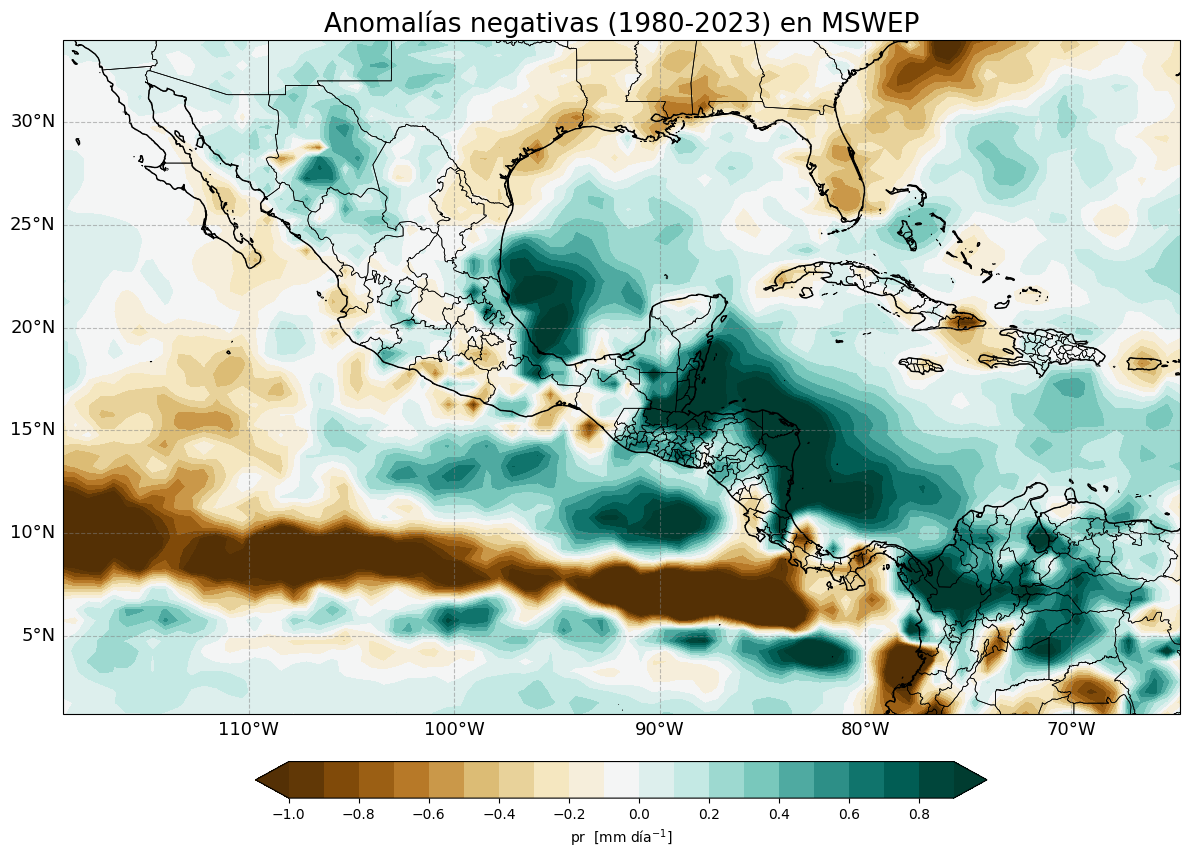

In [34]:
mapa_MC(anom_negativos, np.arange(-1, 1, 0.1), 'BrBG', 'Anomalías negativas (1980-2023) en MSWEP', extend='both',
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)

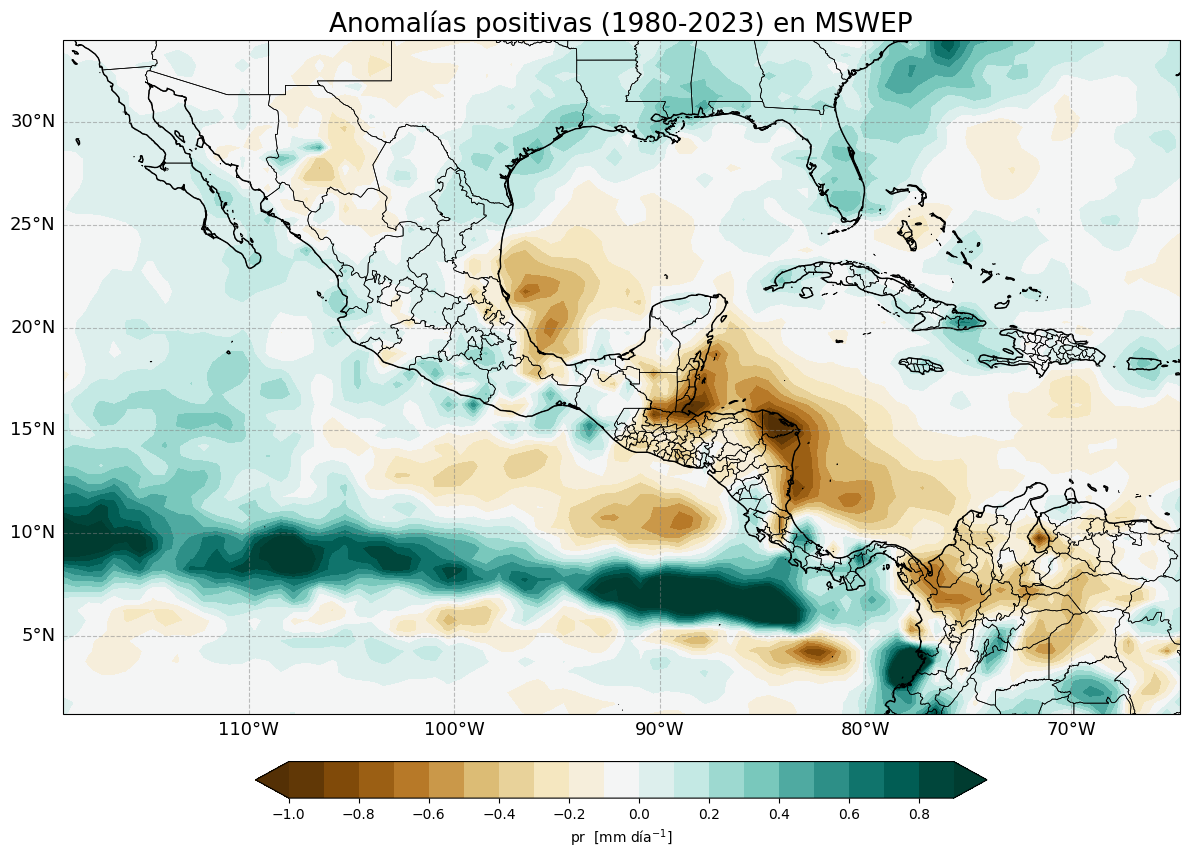

In [35]:
mapa_MC(anom_positivos, np.arange(-1, 1, 0.1), 'BrBG', 'Anomalías positivas (1980-2023) en MSWEP',  extend='both', 
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)

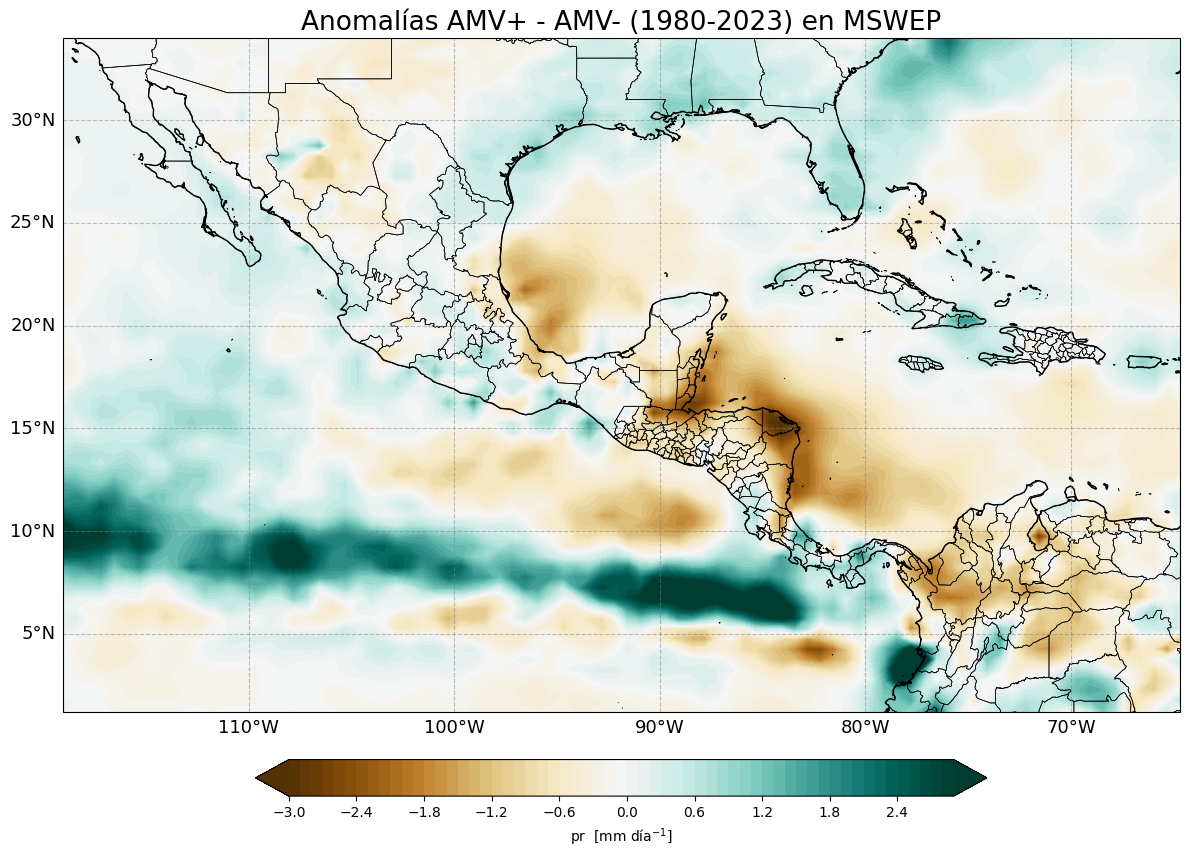

In [36]:
mapa_MC(anom_total, np.arange(-3, 3, 0.1), 'BrBG', 'Anomalías AMV+ - AMV- (1980-2023) en MSWEP',  extend='both', 
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)